In [ ]:
import numpy
from PIL import Image
from sklearn.cluster import KMeans
import numpy as  np
import matplotlib.pyplot as plt

In [ ]:
def get_image(image_path):
    image = Image.open(image_path, "r")
    width, height = image.size
    pixel_values = list(image.getdata())
    if image.mode == "RGB":
        channels = 3
    elif image.mode == "L":
        channels = 1
    else:
        print("Unknown mode: %s" % image.mode)
        return None
    pixel_values = numpy.array(pixel_values).reshape((width, height, channels))
    return pixel_values

In [ ]:
image_path_list=[]
for i in range(1,20):
    image= get_image("girl.png")
    image1=image
    print(image.shape)
    image=image.reshape(-1,3)
    image
    kmeans = KMeans(n_clusters=i,random_state=42)
    kmeans.fit(image)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    compressed_image_2d = (centroids[labels].reshape(image1.shape)).astype(np.uint8)
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 2)
    plt.imsave('pic/girls{}.png'.format(i),compressed_image_2d)
    image_path_list.append('pic/girls{}.png'.format(i))
    plt.title(f'Compressed Image (k={i})')
    plt.imshow(compressed_image_2d)
    plt.axis('off')
    plt.show()


In [ ]:
from PIL import Image
image_list = [Image.open(file) for file in image_path_list]
# Save the first image as a GIF file
image_list[0].save(
            'animation.gif',
            save_all=True,
            append_images=image_list[1:], # append rest of the images
            duration=1000, # in milliseconds
            loop=0)

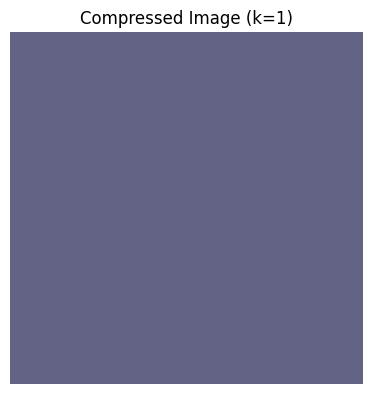

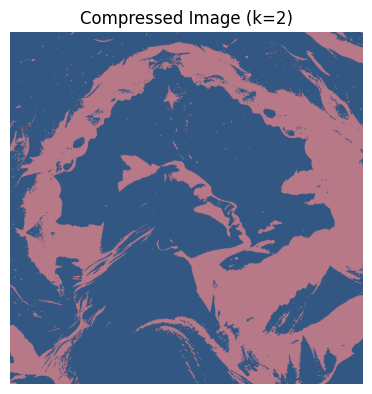

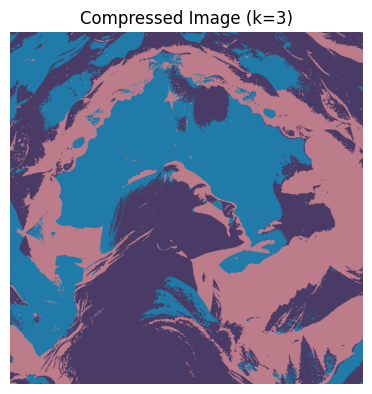

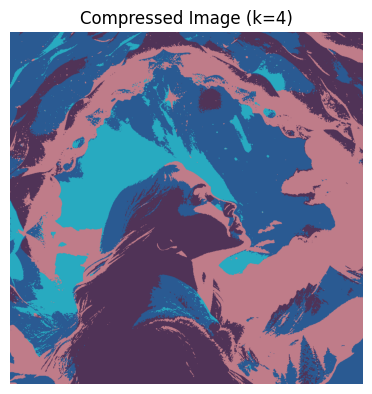

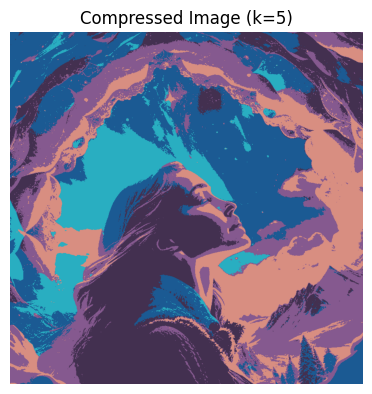

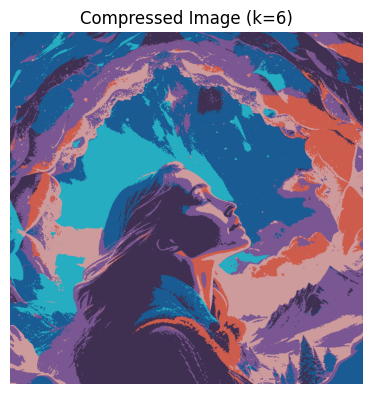

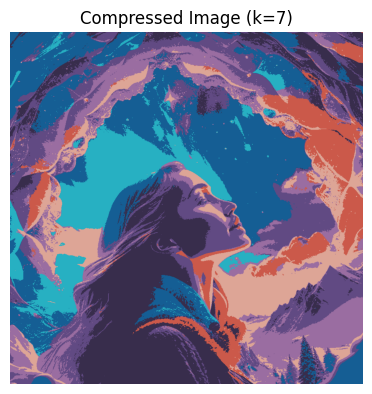

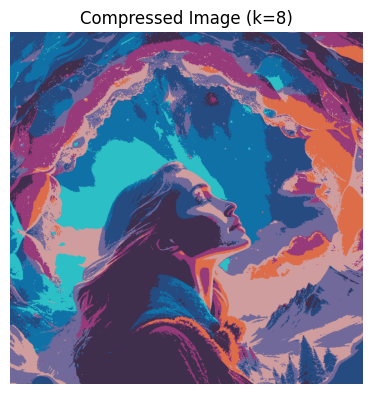

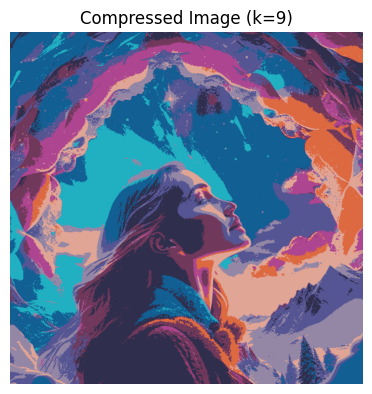

KeyboardInterrupt: 